# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section you've learned a lot about importing, cleaning up, analysing (using descriptive statistics) and visualizing data. In this more free form project you'll get a chance to practice all of these skills with the Boston Housing data set,  which contains housing values in suburbs of Boston. The Boston Housing Data is commonly used by aspiring data scientists.  

## Objectives
You will be able to:
* Show mastery of the content covered in this section

# Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At minimum, this should include:

* Loading the data (which is stored in the file train.csv)
* Use built-in python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations using `.loc`, `.iloc` or related operations. Explain why you used the chosen subsets and do this for 3 possible 2-way splits. State how you think the 2 measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create a 2 new dataframes based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't.
    - Create 2 new datagrames based on a certain split for crime rate.
* Next, use histograms and scatterplots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

In [15]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
boston = pd.read_csv("train.csv", index_col="ID")
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [4]:
boston.shape
# Tells us there are 333 rows and 14 columns

(333, 14)

In [5]:
boston.info()
# Tells us the number of rows, columns, column names, and data types contained within them.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 1 to 506
Data columns (total 14 columns):
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(3)
memory usage: 39.0 KB


In [6]:
bost_cols = boston.columns.tolist()
bost_cols

# Creates a list of the column names from the dataframe

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat',
 'medv']

In [7]:
boston.describe()
# Shows meaningful statistics for each column that contains float or int (numeric) datatypes

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [8]:
boston['crim'].describe()

#Same thing as above but this time just looks at the 'crim' column

count    333.000000
mean       3.360341
std        7.352272
min        0.006320
25%        0.078960
50%        0.261690
75%        3.678220
max       73.534100
Name: crim, dtype: float64

In [9]:
boston['age'].describe()
#Same

count    333.000000
mean      68.226426
std       28.133344
min        6.000000
25%       45.400000
50%       76.700000
75%       93.800000
max      100.000000
Name: age, dtype: float64

In [10]:
boston['black'].describe()
#Same

count    333.000000
mean     359.466096
std       86.584567
min        3.500000
25%      376.730000
50%      392.050000
75%      396.240000
max      396.900000
Name: black, dtype: float64

In [11]:
boston['chas'].value_counts()
# counting the number of areas that border the Charles River. 1 means borders, 0 means it does not

0    313
1     20
Name: chas, dtype: int64

In [12]:
boston_by_charles = boston.loc[boston['chas'] == 1]
boston_not_by_charles = boston.loc[boston['chas'] != 1]

print(boston_by_charles.shape)
print(boston_not_by_charles.shape)

# created two new dataframes. One contains all rows/values for areas that border the charles river while the
# other does not. As you can see from the .shape here and the boston['chas'].value_counts() above this was done
# correctly

(20, 14)
(313, 14)


In [13]:
print(boston_by_charles['crim'].describe())
print('\n')
print(boston_not_by_charles['crim'].describe())

# Just running some descriptive statistics on the charles and non charles data frames

count    20.000000
mean      2.163972
std       2.885734
min       0.015010
25%       0.200377
50%       0.572070
75%       3.453213
max       8.982960
Name: crim, dtype: float64


count    313.000000
mean       3.436787
std        7.544289
min        0.006320
25%        0.078750
50%        0.245220
75%        3.678220
max       73.534100
Name: crim, dtype: float64


In [14]:
q = boston['crim'].quantile(.50)
boston_more_crime = boston.loc[boston['crim'] >= q]
print(boston_more_crime.shape)

boston_less_crime = boston.loc[boston['crim'] < q]
print(boston_less_crime.shape)

# Created two new dataframes based on crime statistics. The first one contains areas with crime equal to or above
# the 50% quantile while the other is below it.

(167, 14)
(166, 14)


/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


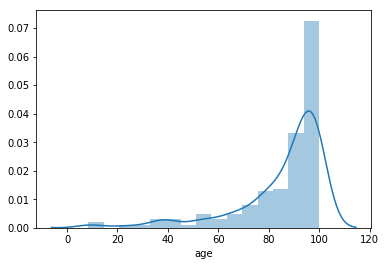

In [17]:
sns.distplot(boston_more_crime.age)

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


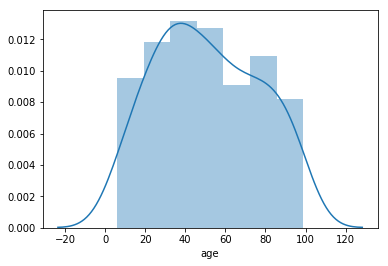

In [18]:
sns.distplot(boston_less_crime.age)

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


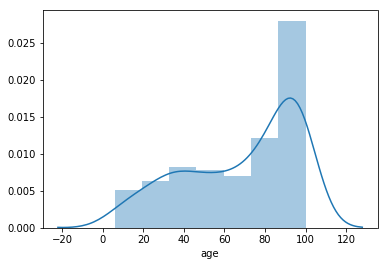

In [19]:
sns.distplot(boston['age'])

In [20]:
boston['age'].value_counts()

# large concentrations of towns where 100% of the owner-occupied units were built prior to 1940. Older historic towns
# or data error?

100.0    26
96.0      4
76.5      3
95.4      3
97.3      3
21.4      3
98.8      3
95.6      3
86.5      2
18.4      2
7.8       2
97.9      2
94.5      2
82.5      2
79.9      2
45.8      2
88.0      2
76.7      2
91.0      2
94.3      2
31.9      2
6.6       2
84.1      2
93.9      2
41.1      2
91.2      2
83.0      2
96.2      2
98.4      2
97.0      2
         ..
20.8      1
73.1      1
54.2      1
82.6      1
99.3      1
81.6      1
83.2      1
97.1      1
69.6      1
28.9      1
90.7      1
66.1      1
56.8      1
88.4      1
36.8      1
21.9      1
27.7      1
33.3      1
58.1      1
93.3      1
33.8      1
94.1      1
84.7      1
98.1      1
61.8      1
84.4      1
66.6      1
94.9      1
78.9      1
39.0      1
Name: age, Length: 260, dtype: int64

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


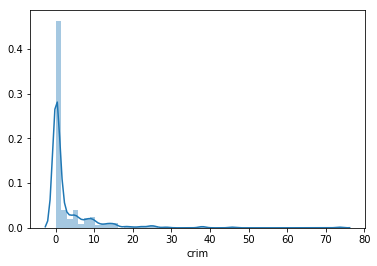

In [21]:
sns.distplot(boston['crim'])

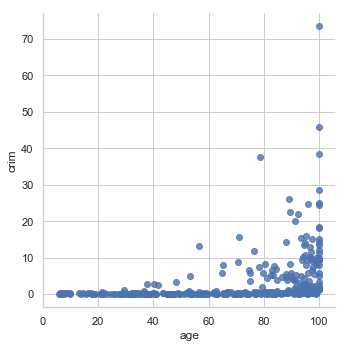

In [24]:
sns.set()
sns.set_style("whitegrid")
sns.lmplot(x='age', y='crim', data=boston, fit_reg=False);

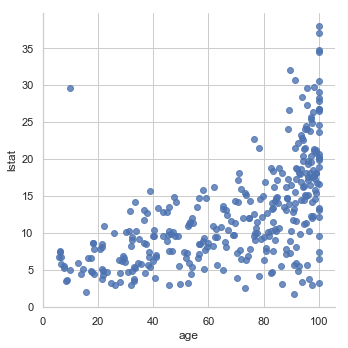

In [31]:
sns.lmplot(x='age', y='lstat', data=boston, fit_reg=False)

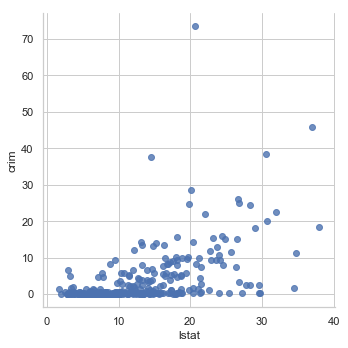

In [33]:
sns.lmplot(x='lstat', y='crim', data=boston, fit_reg=False)

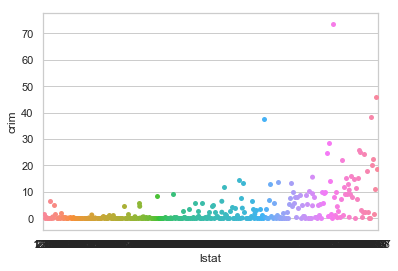

In [34]:
sns.swarmplot(x='lstat', y='crim', data=boston)

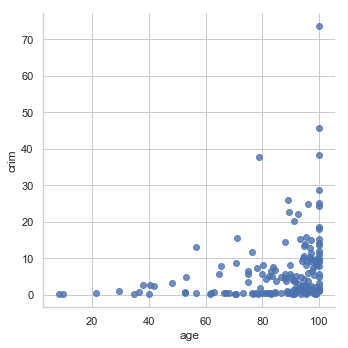

In [38]:
sns.lmplot(x='age', y='crim', data=boston_more_crime, fit_reg=False)

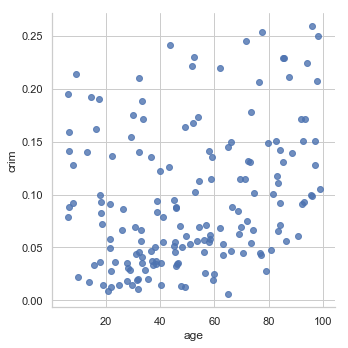

In [39]:
sns.lmplot(x='age', y='crim', data=boston_less_crime, fit_reg=False)

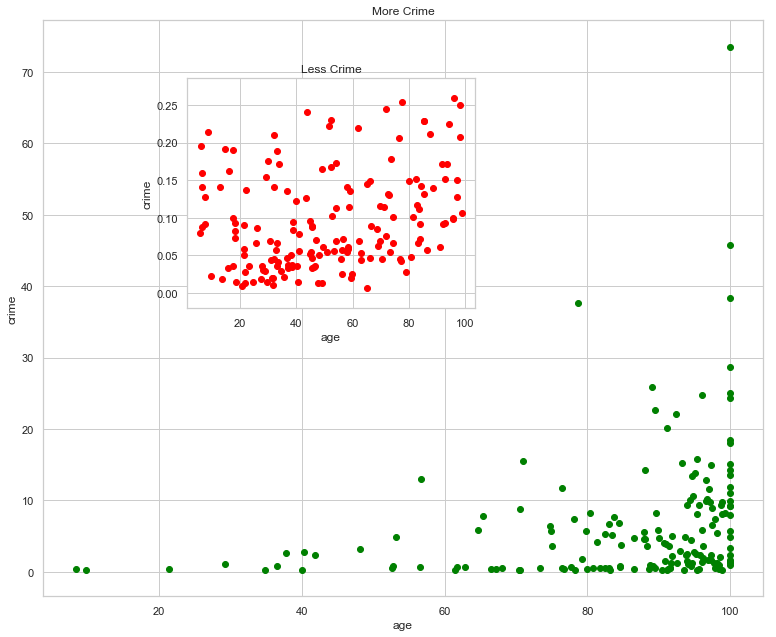

In [55]:
bmc_age = boston_more_crime['age']
blc_age = boston_less_crime['age']
bmc_crime = boston_more_crime['crim']
blc_crime = boston_less_crime['crim']

fig1 = plt.figure(figsize=(10,8),)

bmc = fig1.add_axes([0,0,1,1])
blc = fig1.add_axes([0.2,0.5,.4,.4])

bmc.scatter(bmc_age,bmc_crime, color='green', )
bmc.set_xlabel('age')
bmc.set_ylabel('crime')
bmc.set_title('More Crime')

blc.scatter(blc_age,blc_crime, color='red')
blc.set_xlabel('age')
blc.set_ylabel('crime')
blc.set_title('Less Crime')

plt.show()

# Crime appears to be more prevalent in areas with older constructed homes

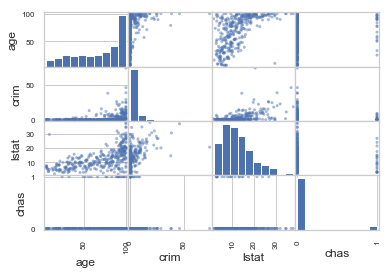

In [56]:
boston_slice = boston.loc[:,['age', 'crim', 'lstat', 'chas']]
pd.plotting.scatter_matrix(boston_slice);

# Variable Descriptions

This data frame contains the following columns:

#### crim  
per capita crime rate by town.

#### zn  
proportion of residential land zoned for lots over 25,000 sq.ft.

#### indus  
proportion of non-retail business acres per town.

#### chas  
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

#### nox  
nitrogen oxides concentration (parts per 10 million).

#### rm  
average number of rooms per dwelling.

#### age  
proportion of owner-occupied units built prior to 1940.

#### dis  
weighted mean of distances to five Boston employment centres.

#### rad  
index of accessibility to radial highways.

#### tax  
full-value property-tax rate per $10,000.

#### ptratio  
pupil-teacher ratio by town.

#### black  
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

#### lstat  
lower status of the population (percent).

#### medv  
median value of owner-occupied homes in $10000s.
  
  
  
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

## Summary

Congratulations, you've completed your first "freeform" exploratory data analysis of a popular data set!